In [1]:
import os
import pandas as pd
# from simulation_pipeline import SimPipeline 
import importlib
import simulation_pipeline
importlib.reload(simulation_pipeline)
from simulation_pipeline import SimPipeline 

### Create a simulation instance

From config file path

In [5]:
sim_name = "new_test"
sim = SimPipeline(from_folder = sim_name, new=False)

In [2]:
CONFIG_PATH = "config_file.yaml"
sim = SimPipeline(CONFIG_PATH)

In [3]:
sim

SimPipeline: new_test

General configuration:
 - Number of events: 20
 - Model: USBL
 - System type: Planets_systems
 - Sources catalog: AstroDataLab
 - Bands: u, g, r, i, z, y
 - Simulation type: lsst_images
 - Data Preview: dp0


Sky region:
 - Distribution: circle
 - Center: (ra=62, dec=-36) deg (icrs)
 - Radius: 0.05 deg
 - Blend distance: 0.001 deg

 - Survey dates (MJD): 60849 to 61944
 - Peak range (MJD): 61579 to 63769.25

Processing:
 - Event processor: ulens
 - Photometry processor: synthetic

Directories:
 - Output dir: runs/new_test
 - Data events: runs/new_test/data-events_1.parquet
 - Photometry: runs/new_test/photometry_1.parquet
 - Calexps photometry: runs/new_test/calexps-photometry_1.parquet

### Simulate light curves

In [4]:
results_events = sim.simulate_lightcurves()

Found 999 calexps.
Loading data from dp02_dc2_catalogs.CcdVisit...
Records found: 5256


Running parallel processing: 100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


#### Check succes or errors

In [5]:
print(results_events.loc[5].error)

In [5]:
results_events

,event_id,status,error
0,3,success,
1,4,success,
2,13,success,
3,14,success,
4,11,success,
5,12,success,
6,1,success,
7,2,success,
8,15,success,
9,16,success,


#### Inspect results

In [53]:
# from simulation_pipeline import SimPipeline 
import importlib
import light_curves
importlib.reload(light_curves)
from light_curves import Event
event = Event.from_parquet(8, sim.calexps_photometry_file, sim.events_file)

<Axes: title={'center': 'Event 8'}, xlabel='Time (MJD)', ylabel='Magnitude'>

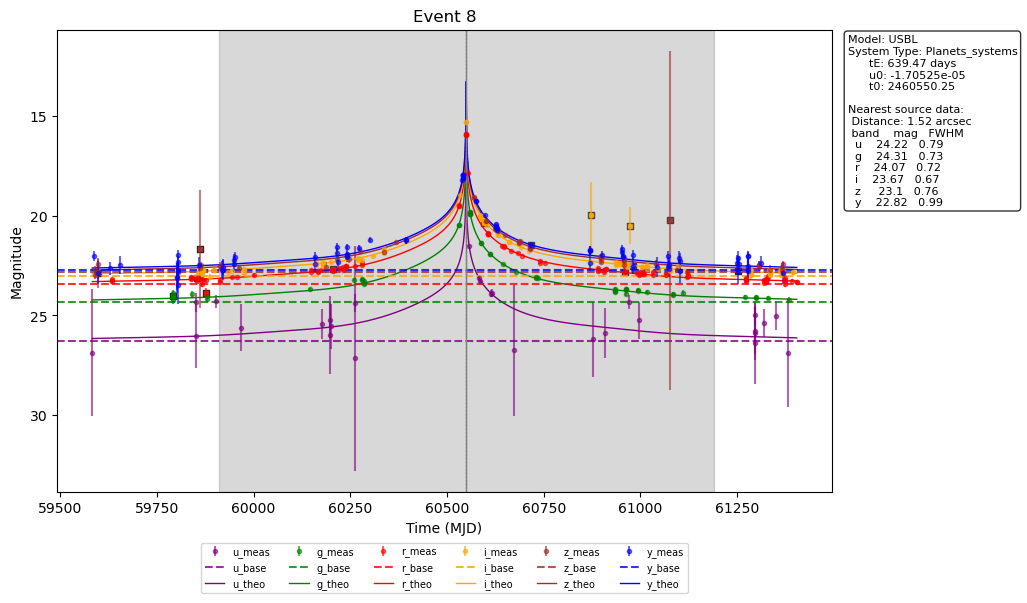

In [54]:
event.plot(show_ideal=False, simulate_ideal=True)

In [56]:
from analysis import plot_event_fov
plot_event_fov(8, sim.name)

Event 8 - Plotting filter light curves:   0%|          | 0/6 [00:00<?, ?it/s]

In [61]:
import pandas as pd
ev = pd.read_parquet(sim.events_file)
# ev.columns
# pd.read_csv("runs/new_test/AstroDataLab_event_sources_catalog.csv")
ph = pd.read_parquet(sim.photometry_file)

### If simulation type is "lsst_images", you can load nearby objects as follows 

In [6]:
sim.load_nearby_objects()

Loading data from dp02_dc2_catalogs.Object...
Records found: 6639


In [7]:
results_calexps = sim.process_synthetic_photometry()

Running parallel processing: 100%|██████████| 8/8 [10:58<00:00, 82.32s/it]   


In [11]:
results_calexps.error.value_counts()

error
                                              779
No sources to inject: skipping this calexp    220
Name: count, dtype: int64

In [10]:
print(results_calexps[results_calexps["calexp_id"]==252].error)

376    
Name: error, dtype: object


In [9]:
results_calexps

,calexp_id,status,error
0,375,success,
1,376,failed,No sources to inject: skipping this calexp
2,377,success,
3,378,success,
4,379,success,
...,...,...,...
994,120,success,
995,121,failed,No sources to inject: skipping this calexp
996,122,success,
997,123,success,


### Analysis

In [21]:
import analysis
importlib.reload(analysis)
from analysis import plot_sky_map, generate_time_log, generate_summary_plot
plot_sky_map(sim.name, zoom = 0.05)

Loading data from dp02_dc2_catalogs.Source...
Records found: 138380


In [46]:
import analysis
importlib.reload(analysis)
from analysis import plot_sky_map, generate_time_log, generate_summary_plot
generate_time_log(sim.name)
generate_summary_plot(sim.name)

(                             item                                        task  \
 4                          Calexp                              Loading calexp   
 6                          Calexp                                   Measuring   
 3                          Calexp                                   Injecting   
 5                          Calexp                Loading events for injection   
 8                          Calexp                   Saving photometry results   
 ..                            ...                                         ...   
 203              lsst.measurement  Performing forced measurement on 7 sources   
 204              lsst.measurement  Performing forced measurement on 8 sources   
 205              lsst.measurement  Performing forced measurement on 9 sources   
 206  process_synthetic_photometry                process_synthetic_photometry   
 207          simulate_lightcurves                        simulate_lightcurves   
 
      count  t

In [50]:
results_df = sim.compute_events_chi2()

Running parallel processing: 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]


In [51]:
results_df

,event_id,status,error
0,1,success,
1,14,success,
2,13,success,
3,3,success,
4,15,success,
5,9,success,
6,7,success,
7,11,success,
8,8,success,
9,6,success,


In [52]:
pd.read_parquet(sim.events_file)

,event_id,ra,dec,model,system_type,points,logL,logTe,D_L,D_S,...,p_value_r,p_value_u,p_value_y,p_value_z,dof_g,dof_i,dof_r,dof_u,dof_y,dof_z
0,13,61.986305,-35.993687,USBL,Planets_systems,491,-2.169,3.5707,5248.0,7889.0,...,6.170076e-239,3.245981e-02,5.028333e-03,1.586426e-16,53.0,99.0,108.0,32.0,80.0,50.0
1,3,61.966808,-36.003048,USBL,Planets_systems,491,1.659,3.7111,6834.0,7359.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,52.0,101.0,110.0,34.0,78.0,48.0
2,7,62.009853,-35.979130,USBL,Planets_systems,491,-0.023,3.7699,6965.0,7516.0,...,0.000000e+00,NaN,0.000000e+00,0.000000e+00,52.0,96.0,107.0,36.0,79.0,49.0
3,11,62.006210,-35.961353,USBL,Planets_systems,491,-1.677,3.6234,7887.0,7989.0,...,4.739302e-01,2.113814e-01,6.926081e-02,1.288388e-01,53.0,101.0,103.0,31.0,74.0,50.0
4,1,62.034294,-36.027569,USBL,Planets_systems,491,-2.298,3.5191,4581.0,7715.0,...,3.467976e-01,2.781362e-01,7.064363e-01,2.075542e-03,52.0,102.0,106.0,34.0,79.0,49.0
5,14,62.058517,-35.988567,USBL,Planets_systems,491,-1.186,3.6664,6545.0,7158.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,53.0,103.0,108.0,34.0,76.0,51.0
6,15,62.055229,-35.979580,USBL,Planets_systems,491,-1.701,3.5808,3828.0,7901.0,...,0.000000e+00,4.399416e-01,0.000000e+00,0.000000e+00,55.0,99.0,105.0,33.0,74.0,48.0
7,9,61.971760,-36.030972,USBL,Planets_systems,491,-0.968,3.6864,4616.0,7994.0,...,0.000000e+00,1.881908e-02,2.403833e-73,0.000000e+00,52.0,95.0,110.0,29.0,76.0,48.0
8,5,62.034660,-35.981194,USBL,Planets_systems,491,-2.174,3.5934,3573.0,6326.0,...,8.760936e-01,1.312552e-01,1.008930e-01,8.158348e-01,52.0,101.0,111.0,34.0,77.0,49.0
9,4,61.978260,-36.024632,USBL,Planets_systems,491,-3.020,3.4340,7332.0,7353.0,...,1.736299e-05,5.313865e-01,2.197062e-01,7.087297e-02,52.0,93.0,110.0,30.0,76.0,48.0


In [1]:
import analysis
import importlib
importlib.reload(analysis)
from analysis import plot_event_fov
plot_event_fov(8, "new_test")

Event 8 - Plotting filter light curves:   0%|          | 0/6 [00:00<?, ?it/s]